# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [1]:
# Code to ignore warnings

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings("ignore")

In [2]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as sp
from statistics import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import NearMiss
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## Reading data and initial processing

In [3]:
#edit the file location of raw data set
data=pd.read_csv(r'C:\Users\Sammed\Downloads\Telecom Data - Machine Learning\Telecom Data.csv')
data

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [4]:
# Printing the first 5 rows of the dataset

data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
# Displaying the count and datatype of each column in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
data.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [7]:
# Finding number of customers with monthly revenue 0

len(data[data["MonthlyRevenue"] == 0])

6

In [8]:
# Fidning number of columns have missing values more than 5%

data['missing_percentage'] = data[data.isnull().any(axis=1)].apply(lambda x : 100 - ((x.count()/58)*100),axis=1)
len(data[data['missing_percentage']>5])

159

In [9]:
data.drop('missing_percentage',axis=1,inplace=True)

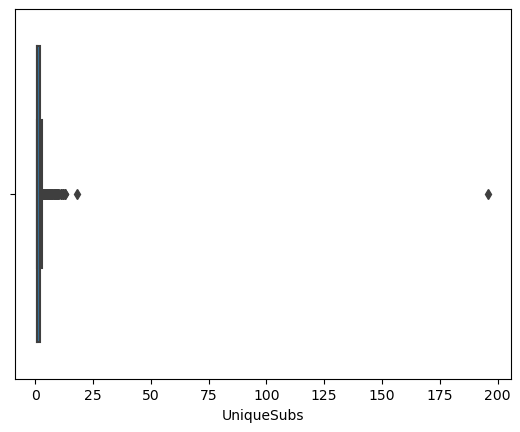

In [10]:
# Plotting boxplot for the Unique Subscriptions column

sns.boxplot(x = data['UniqueSubs'])
plt.show()

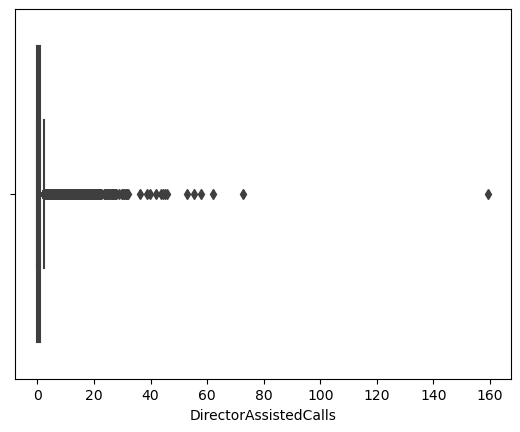

In [11]:
# Plotting boxplot for the number of automated calls

sns.boxplot(x = data['DirectorAssistedCalls'])
plt.show()

In [12]:
# Defining a function to drop outliers in the above mentioned 2 columns

def outlier(data):
    Q1 = data['UniqueSubs'].quantile(0.25)
    Q3 = data['UniqueSubs'].quantile(0.75)
    IQR = Q3-Q1
    data['UniqueSubs'] = data['UniqueSubs'][~((data['UniqueSubs'] < (Q1 - 1.5 * IQR)) |(data['UniqueSubs'] > (Q3 + 1.5 * IQR)))]
    Q1 = data['DirectorAssistedCalls'].quantile(0.25)
    Q3 = data['DirectorAssistedCalls'].quantile(0.75)
    IQR = Q3-Q1
    data['DirectorAssistedCalls'] = data['DirectorAssistedCalls'][~((data['DirectorAssistedCalls'] < (Q1 - 1.5 * IQR)) |(data['DirectorAssistedCalls'] > (Q3 + 1.5 * IQR)))]

In [13]:
# Defining a function to do missing value imputation in the columns

def null(data):
    data['MonthlyRevenue'].fillna(value = int(data['MonthlyRevenue'].mean()),inplace=True)
    data['MonthlyMinutes'].fillna(value = data['MonthlyMinutes'].mean(),inplace=True)
    data['TotalRecurringCharge'].fillna(value = data['TotalRecurringCharge'].mean(),inplace=True)
    data['DirectorAssistedCalls'].fillna(value = data['DirectorAssistedCalls'].mean(),inplace=True)
    data['OverageMinutes'].fillna(value = data['OverageMinutes'].mean(),inplace=True)
    data['RoamingCalls'].fillna(value = data['RoamingCalls'].mean(),inplace=True)
    data['PercChangeRevenues'].fillna(value = data['PercChangeRevenues'].mean(),inplace=True)
    data['PercChangeMinutes'].fillna(value = data['PercChangeMinutes'].mean(),inplace=True)
    data['ServiceArea'].fillna(value = " ",inplace=True)
    data['AgeHH2'].fillna(value = mode(data['AgeHH2']),inplace=True)
    data['AgeHH1'].fillna(value = mode(data['AgeHH1']),inplace=True)
    data['CurrentEquipmentDays'].fillna(value = mode(data['CurrentEquipmentDays']),inplace=True)
    data['HandsetModels'].fillna(value = mode(data['HandsetModels']),inplace=True)
    data['Handsets'].fillna(value = mode(data['Handsets']),inplace=True)
    data["UniqueSubs"].fillna(value = mode(data["UniqueSubs"]),inplace=True)
    data.replace("Yes",int(1),inplace=True)
    data.replace("No",int(0),inplace=True)
    data.replace("Known",inplace=True)
    data.replace("Unknown",(2),inplace=True)
    data['MaritalStatus'] = data['MaritalStatus'].astype(int)
    data['HandsetPrice'] = data['HandsetPrice'].astype(int)

In [14]:
# Dropping columns that don't affect churn

def drop(data):
    data.drop(['Homeownership','ServiceArea','RVOwner','TruckOwner',"CustomerID"],axis=1,inplace=True)

In [15]:
# Function to convert the credit rating column to float datatype

def credit(data):
    for i in range(len(data['CreditRating'])):
        data['CreditRating'][i] = re.sub('[^0-9]'," ",data['CreditRating'][i])
    data['CreditRating'] = data['CreditRating'].astype(float)
    data = pd.get_dummies(data,drop_first=True)
    return data

In [16]:
outlier(data)
null(data)
drop(data)
data = credit(data)

## Exploratory Analysis

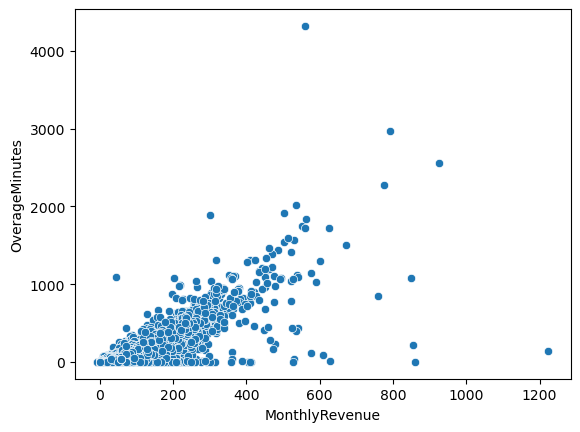

In [17]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data =data )
plt.show()

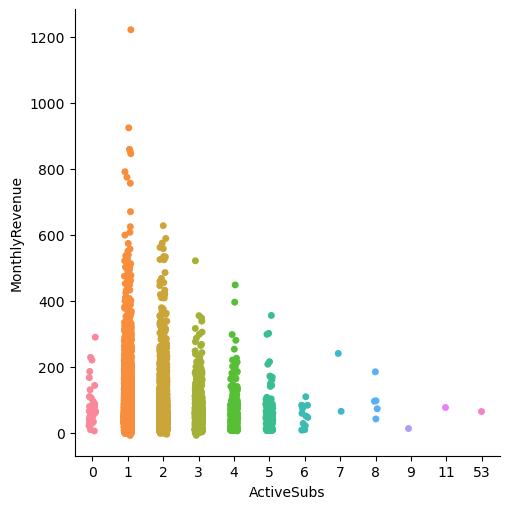

In [18]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs',y = 'MonthlyRevenue',data = data)
plt.show()

No handles with labels found to put in legend.


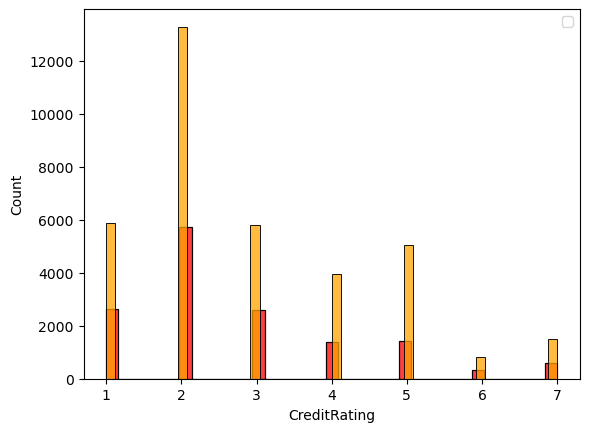

In [19]:
#type your code here for any additional exploratory analysis (if any)
# Plotting a bargraph to see hoe credit rating affects churn rate

yes = data.loc[data['Churn']==1, "CreditRating"]
no =  data.loc[data['Churn']==0, "CreditRating"]

sns.histplot(yes,color="red")
sns.histplot(no,color = "orange")

plt.legend()
plt.show()

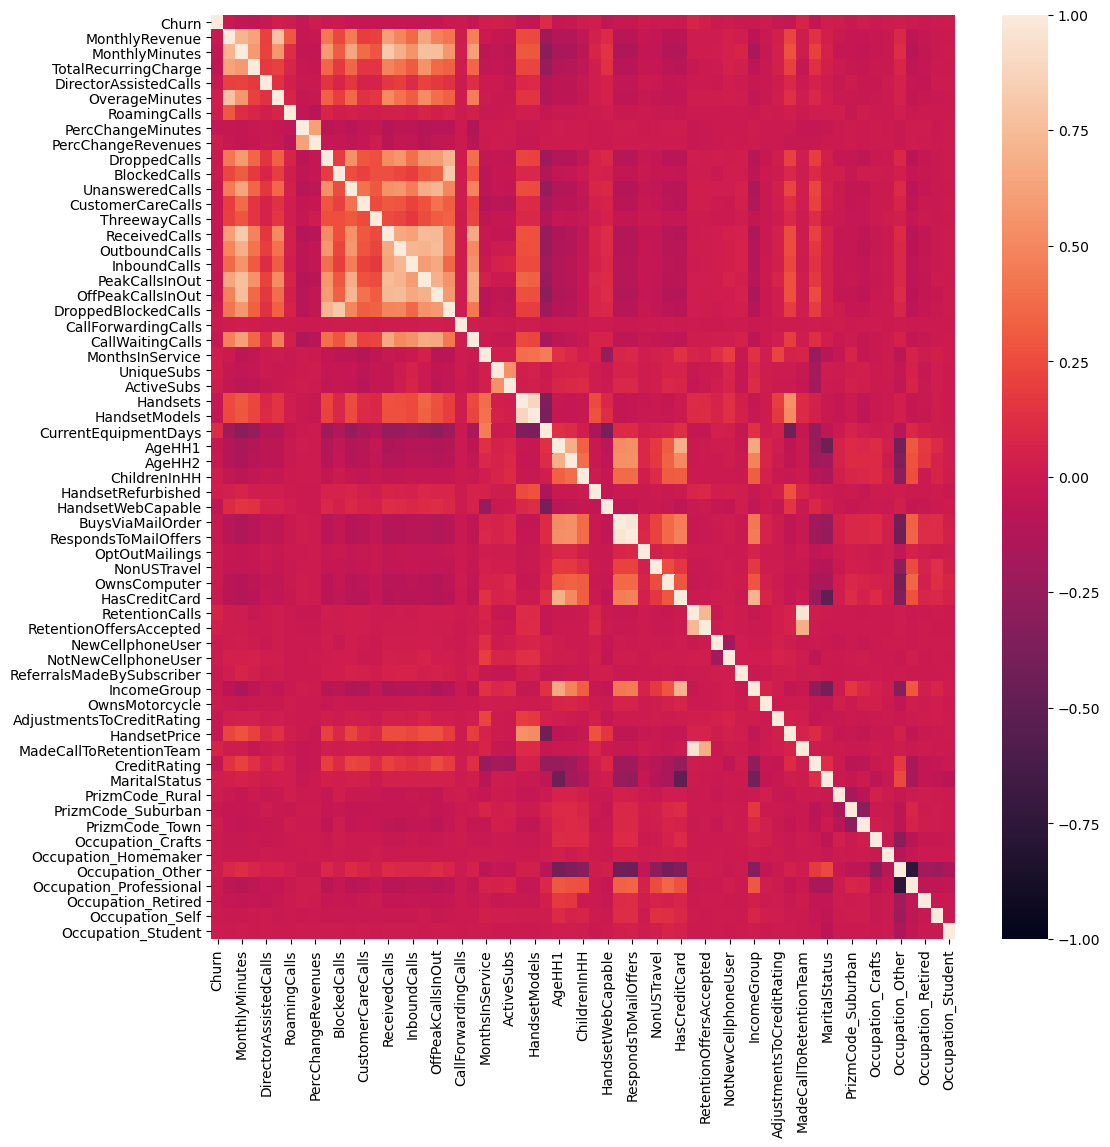

In [20]:
# Plotting heatmap to study the correlation among all the columns

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmin=-1, vmax=1)
plt.show()

## Feature Engineering

In [21]:
#wrapper function to create additional features for churn prediction
def create_features(data):
    data['Active_Over_Total'] = data['ActiveSubs']/data['UniqueSubs']*100
    data['Overage_Over_Monthly'] = data['OverageMinutes']/data['MonthlyMinutes']*100
    data['Overage_Over_Monthly'].fillna(0,inplace=True) 

In [22]:
#Make a call to the feature engineering wrapper function for churn prediction
create_features(data)

## Checking for Multicollinearity

In [23]:
# Calculating variance inflation factor to reduce multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["create_features"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]

In [24]:
# Dropping those columns with VIF greater than 10

data.drop(vif_data[vif_data['VIF']>10]['create_features'],axis=1,inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  int64  
 1   DirectorAssistedCalls      51047 non-null  float64
 2   OverageMinutes             51047 non-null  float64
 3   RoamingCalls               51047 non-null  float64
 4   PercChangeMinutes          51047 non-null  float64
 5   PercChangeRevenues         51047 non-null  float64
 6   UnansweredCalls            51047 non-null  float64
 7   CustomerCareCalls          51047 non-null  float64
 8   ThreewayCalls              51047 non-null  float64
 9   ReceivedCalls              51047 non-null  float64
 10  OutboundCalls              51047 non-null  float64
 11  InboundCalls               51047 non-null  float64
 12  PeakCallsInOut             51047 non-null  float64
 13  OffPeakCallsInOut          51047 non-null  flo

## Prediction

In [26]:
X = data.drop("Churn",axis=1)
Y = data['Churn']

In [27]:
#Performing undersampling since the dataset is unbalanced.

undersample = NearMiss(version=1)
X, Y = undersample.fit_resample(X, Y)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [29]:
# Standardizing the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
pred_log = model_log.predict(X_test)
print(accuracy_score(y_test,pred_log),'\n',f1_score(y_test,pred_log),'\n',precision_score(y_test,pred_log),'\n',recall_score(y_test,pred_log))

0.7163976210705183 
 0.6757334369535652 
 0.7973406694176983 
 0.5863115306810519


In [31]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train) 
pred_rf = model_rf.predict(X_test)
print(accuracy_score(y_test,pred_rf),'\n',f1_score(y_test,pred_rf),'\n',precision_score(y_test,pred_rf),'\n',recall_score(y_test,pred_rf))

0.7423959218351742 
 0.7018095987411488 
 0.842304060434372 
 0.6014834794335806


In [32]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
pred_xgb = model_xgb.predict(X_test)
print(accuracy_score(y_test,pred_xgb),'\n',f1_score(y_test,pred_xgb),'\n',precision_score(y_test,pred_xgb),'\n',recall_score(y_test,pred_xgb))

[17:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7371282922684792 
 0.7015242137758055 
 0.8200270635994588 
 0.6129467296021578


In [33]:
model_cat = CatBoostClassifier(silent=True)
model_cat.fit(X_train,y_train)
pred_cat = model_cat.predict(X_test)
print(accuracy_score(y_test,pred_cat),'\n',f1_score(y_test,pred_cat),'\n',precision_score(y_test,pred_cat),'\n',recall_score(y_test,pred_cat))

0.7510620220900595 
 0.7138112912678257 
 0.8485833720390153 
 0.6159811193526635


## Prediction on Test Dataset

In [34]:
test = pd.read_csv(r"C:\Users\Sammed\Downloads\Telecom Data - Machine Learning\Telecom - Prediction Data.csv")

In [35]:
test.drop('Churn',axis=1,inplace=True)

In [36]:
outlier(test)
null(test)
drop(test)
test = credit(test)
create_features(test) 
test.drop(vif_data[vif_data['VIF']>10]['create_features'],axis=1,inplace=True)

In [37]:
test = scaler.transform(test)

In [38]:
pred = model_cat.predict(test)